# 과적합 : 와인종류 예측하기

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 모델 업데이트하기  
에포크마다 업데이트

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import os

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre=pd.read_csv('C:/Users/user/machine_learning1/wine.csv',header=None)
df=df_pre.sample(frac=1) #100% 읽어옴 frac=1
dataset=df.values
X=dataset[:,0:12]   
Y=dataset[:,12] 

model=Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'

#save_best_only=True : 에포크가 진행되면서 모든 값이 저장되는 것이 아니라, 테스트 오차를 실행한 결과값이 향상되었을 때에만 저장됨
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True) 

hist=model.fit(X,Y,validation_split=0.2,epochs=200,batch_size=200,verbose=0,callbacks=[checkpointer])

print('Accuracy:{}'.format(model.evaluate(X,Y)[1]))


Epoch 00001: val_loss improved from inf to 0.29722, saving model to ./model\01-0.2972.hdf5

Epoch 00002: val_loss improved from 0.29722 to 0.25425, saving model to ./model\02-0.2543.hdf5

Epoch 00003: val_loss improved from 0.25425 to 0.23356, saving model to ./model\03-0.2336.hdf5

Epoch 00004: val_loss improved from 0.23356 to 0.21444, saving model to ./model\04-0.2144.hdf5

Epoch 00005: val_loss improved from 0.21444 to 0.19984, saving model to ./model\05-0.1998.hdf5

Epoch 00006: val_loss improved from 0.19984 to 0.19539, saving model to ./model\06-0.1954.hdf5

Epoch 00007: val_loss improved from 0.19539 to 0.19016, saving model to ./model\07-0.1902.hdf5

Epoch 00008: val_loss did not improve from 0.19016

Epoch 00009: val_loss improved from 0.19016 to 0.18586, saving model to ./model\09-0.1859.hdf5

Epoch 00010: val_loss improved from 0.18586 to 0.18406, saving model to ./model\10-0.1841.hdf5

Epoch 00011: val_loss did not improve from 0.18406

Epoch 00012: val_loss improved from


Epoch 00113: val_loss improved from 0.05665 to 0.05583, saving model to ./model\113-0.0558.hdf5

Epoch 00114: val_loss did not improve from 0.05583

Epoch 00115: val_loss did not improve from 0.05583

Epoch 00116: val_loss did not improve from 0.05583

Epoch 00117: val_loss improved from 0.05583 to 0.05531, saving model to ./model\117-0.0553.hdf5

Epoch 00118: val_loss did not improve from 0.05531

Epoch 00119: val_loss did not improve from 0.05531

Epoch 00120: val_loss did not improve from 0.05531

Epoch 00121: val_loss did not improve from 0.05531

Epoch 00122: val_loss did not improve from 0.05531

Epoch 00123: val_loss did not improve from 0.05531

Epoch 00124: val_loss did not improve from 0.05531

Epoch 00125: val_loss improved from 0.05531 to 0.05483, saving model to ./model\125-0.0548.hdf5

Epoch 00126: val_loss did not improve from 0.05483

Epoch 00127: val_loss did not improve from 0.05483

Epoch 00128: val_loss improved from 0.05483 to 0.05457, saving model to ./model\128-

# 과적합 그래프  
학습이 진행될수록, 학습셋의 정확도 상승 but 과적합으로 인해 테스트셋의 오차는 감소하다가 증가함

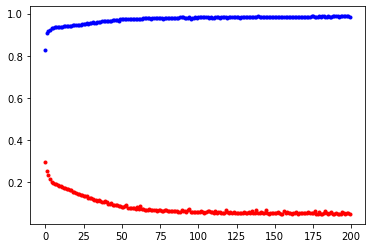

In [25]:
#모델 실행 및 저장
#hist=model.fit(X,Y,validation_split=0.33,epochs=3500,batch_size=500)

#테스트셋으로 실험결과의 오차값을 저장
y_vloss=hist.history['val_loss']

#학습셋으로 측정한 정확도의 값을 저장
y_acc=hist.history['accuracy']

#x값을 지정하고 정확도를 파란색으로,오차를 빨간색으로
x_len=np.arange(len(y_acc))
plt.plot(x_len,y_vloss,'o',c='red',markersize=3)
plt.plot(x_len,y_acc,'o',c='blue',markersize=3)

plt.show()

# EarlyStopping() : 과적합을 멈추게 하는 함수

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping   #과적합 멈추게 함
from tensorflow.keras.callbacks import ModelCheckpoint  #모델 계속 모니터링 및 저장

np.random.seed(0)
tf.random.set_seed(0)

df_pre=pd.read_csv('C:/Users/user/machine_learning1/wine.csv',header=None)
df=df_pre.sample(frac=0.15) #전체 샘플 중 15%정도 읽음
dataset=df.values
X=dataset[:,0:12]
Y=dataset[:,12]

model=Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#모델 저장 폴더 만들기
import os
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
#모델 업데이트 및 저장
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True) #성능 좋아질때만 저장됨

#학습 자동중단 설정
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=100) #patience=100 : 100개의 데이터까지 개선이 없으면 멈춰라

#모델 실행
hist=model.fit(X,Y,validation_split=0.33,epochs=3500,batch_size=500,
         callbacks=[early_stopping_callback,checkpointer])

print('Accuracy:{}'.format(model.evaluate(X,Y)[1]))

Epoch 1/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.7851 - accuracy: 0.7720
Epoch 00001: val_loss improved from inf to 0.57246, saving model to ./model\01-0.5725.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.7844 - accuracy: 0.7596 - val_loss: 0.5725 - val_accuracy: 0.7795
Epoch 2/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.6172 - accuracy: 0.7660
Epoch 00002: val_loss improved from 0.57246 to 0.41434, saving model to ./model\02-0.4143.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.5981 - accuracy: 0.7642 - val_loss: 0.4143 - val_accuracy: 0.7826
Epoch 3/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.4303 - accuracy: 0.7800
Epoch 00003: val_loss improved from 0.41434 to 0.32497, saving model to ./model\03-0.3250.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.4410 - accuracy: 0.7718 - val_loss: 0.3250 - val_accuracy: 0.7950
Epoch 4/3500
1/2 [==============>...............] - E

Epoch 28/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2647 - accuracy: 0.9040
Epoch 00028: val_loss did not improve from 0.24818
2/2 [==============================] - 0s 7ms/step - loss: 0.2632 - accuracy: 0.9051 - val_loss: 0.2482 - val_accuracy: 0.9130
Epoch 29/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2525 - accuracy: 0.9100
Epoch 00029: val_loss improved from 0.24818 to 0.24746, saving model to ./model\29-0.2475.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.2623 - accuracy: 0.9035 - val_loss: 0.2475 - val_accuracy: 0.9130
Epoch 30/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2469 - accuracy: 0.9040
Epoch 00030: val_loss improved from 0.24746 to 0.24529, saving model to ./model\30-0.2453.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.2603 - accuracy: 0.9035 - val_loss: 0.2453 - val_accuracy: 0.9161
Epoch 31/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2664 - accuracy: 0.8

Epoch 54/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2090 - accuracy: 0.9280
Epoch 00054: val_loss improved from 0.21285 to 0.21130, saving model to ./model\54-0.2113.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 0.2150 - accuracy: 0.9250 - val_loss: 0.2113 - val_accuracy: 0.9348
Epoch 55/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2278 - accuracy: 0.9200
Epoch 00055: val_loss improved from 0.21130 to 0.21019, saving model to ./model\55-0.2102.hdf5
2/2 [==============================] - 0s 14ms/step - loss: 0.2136 - accuracy: 0.9265 - val_loss: 0.2102 - val_accuracy: 0.9348
Epoch 56/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2031 - accuracy: 0.9340
Epoch 00056: val_loss improved from 0.21019 to 0.20932, saving model to ./model\56-0.2093.hdf5
2/2 [==============================] - 0s 14ms/step - loss: 0.2129 - accuracy: 0.9265 - val_loss: 0.2093 - val_accuracy: 0.9379
Epoch 57/3500
1/2 [==============>............

Epoch 107/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1813 - accuracy: 0.9440
Epoch 00107: val_loss did not improve from 0.18830
2/2 [==============================] - 0s 6ms/step - loss: 0.1889 - accuracy: 0.9342 - val_loss: 0.1883 - val_accuracy: 0.9472
Epoch 108/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.2101 - accuracy: 0.9240
Epoch 00108: val_loss improved from 0.18830 to 0.18719, saving model to ./model\108-0.1872.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.1887 - accuracy: 0.9342 - val_loss: 0.1872 - val_accuracy: 0.9472
Epoch 109/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1956 - accuracy: 0.9280
Epoch 00109: val_loss improved from 0.18719 to 0.18610, saving model to ./model\109-0.1861.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.1877 - accuracy: 0.9342 - val_loss: 0.1861 - val_accuracy: 0.9472
Epoch 110/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1868 - accurac

Epoch 134/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1786 - accuracy: 0.9300
Epoch 00134: val_loss improved from 0.17978 to 0.17856, saving model to ./model\134-0.1786.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.1799 - accuracy: 0.9342 - val_loss: 0.1786 - val_accuracy: 0.9472
Epoch 135/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1695 - accuracy: 0.9380
Epoch 00135: val_loss improved from 0.17856 to 0.17741, saving model to ./model\135-0.1774.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.1785 - accuracy: 0.9357 - val_loss: 0.1774 - val_accuracy: 0.9503
Epoch 136/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1720 - accuracy: 0.9420
Epoch 00136: val_loss did not improve from 0.17741
2/2 [==============================] - 0s 6ms/step - loss: 0.1790 - accuracy: 0.9372 - val_loss: 0.1778 - val_accuracy: 0.9472
Epoch 137/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1871 - accurac

Epoch 162/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1749 - accuracy: 0.9340
Epoch 00162: val_loss did not improve from 0.17044
2/2 [==============================] - 0s 7ms/step - loss: 0.1730 - accuracy: 0.9357 - val_loss: 0.1705 - val_accuracy: 0.9441
Epoch 163/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1647 - accuracy: 0.9400
Epoch 00163: val_loss did not improve from 0.17044
2/2 [==============================] - 0s 7ms/step - loss: 0.1719 - accuracy: 0.9342 - val_loss: 0.1707 - val_accuracy: 0.9472
Epoch 164/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1606 - accuracy: 0.9420
Epoch 00164: val_loss did not improve from 0.17044
2/2 [==============================] - 0s 7ms/step - loss: 0.1710 - accuracy: 0.9342 - val_loss: 0.1716 - val_accuracy: 0.9472
Epoch 165/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1814 - accuracy: 0.9260
Epoch 00165: val_loss did not improve from 0.17044
2/2 [==========================

Epoch 219/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1574 - accuracy: 0.9300
Epoch 00219: val_loss did not improve from 0.15357
2/2 [==============================] - 0s 7ms/step - loss: 0.1538 - accuracy: 0.9357 - val_loss: 0.1578 - val_accuracy: 0.9472
Epoch 220/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1697 - accuracy: 0.9300
Epoch 00220: val_loss did not improve from 0.15357
2/2 [==============================] - 0s 7ms/step - loss: 0.1537 - accuracy: 0.9372 - val_loss: 0.1571 - val_accuracy: 0.9472
Epoch 221/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1309 - accuracy: 0.9440
Epoch 00221: val_loss did not improve from 0.15357
2/2 [==============================] - 0s 7ms/step - loss: 0.1530 - accuracy: 0.9357 - val_loss: 0.1559 - val_accuracy: 0.9441
Epoch 222/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1599 - accuracy: 0.9320
Epoch 00222: val_loss did not improve from 0.15357
2/2 [==========================

Epoch 248/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1522 - accuracy: 0.9360
Epoch 00248: val_loss improved from 0.14498 to 0.14391, saving model to ./model\248-0.1439.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.1434 - accuracy: 0.9387 - val_loss: 0.1439 - val_accuracy: 0.9410
Epoch 249/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1483 - accuracy: 0.9400
Epoch 00249: val_loss did not improve from 0.14391
2/2 [==============================] - 0s 7ms/step - loss: 0.1429 - accuracy: 0.9418 - val_loss: 0.1440 - val_accuracy: 0.9441
Epoch 250/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1462 - accuracy: 0.9380
Epoch 00250: val_loss did not improve from 0.14391
2/2 [==============================] - 0s 6ms/step - loss: 0.1419 - accuracy: 0.9387 - val_loss: 0.1447 - val_accuracy: 0.9441
Epoch 251/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1431 - accuracy: 0.9380
Epoch 00251: val_loss did not improv

1/2 [==============>...............] - ETA: 0s - loss: 0.1197 - accuracy: 0.9480
Epoch 00303: val_loss did not improve from 0.11867
2/2 [==============================] - 0s 7ms/step - loss: 0.1204 - accuracy: 0.9449 - val_loss: 0.1238 - val_accuracy: 0.9503
Epoch 304/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1290 - accuracy: 0.9380
Epoch 00304: val_loss did not improve from 0.11867
2/2 [==============================] - 0s 7ms/step - loss: 0.1221 - accuracy: 0.9433 - val_loss: 0.1225 - val_accuracy: 0.9503
Epoch 305/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1255 - accuracy: 0.9400
Epoch 00305: val_loss improved from 0.11867 to 0.11774, saving model to ./model\305-0.1177.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.1208 - accuracy: 0.9433 - val_loss: 0.1177 - val_accuracy: 0.9472
Epoch 306/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1230 - accuracy: 0.9480
Epoch 00306: val_loss improved from 0.11774 to 0.11

Epoch 331/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1063 - accuracy: 0.9660
Epoch 00331: val_loss did not improve from 0.10927
2/2 [==============================] - 0s 6ms/step - loss: 0.1110 - accuracy: 0.9556 - val_loss: 0.1105 - val_accuracy: 0.9503
Epoch 332/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1121 - accuracy: 0.9500
Epoch 00332: val_loss did not improve from 0.10927
2/2 [==============================] - 0s 6ms/step - loss: 0.1082 - accuracy: 0.9495 - val_loss: 0.1110 - val_accuracy: 0.9472
Epoch 333/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1065 - accuracy: 0.9520
Epoch 00333: val_loss improved from 0.10927 to 0.10915, saving model to ./model\333-0.1091.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 0.1085 - accuracy: 0.9479 - val_loss: 0.1091 - val_accuracy: 0.9534
Epoch 334/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1036 - accuracy: 0.9520
Epoch 00334: val_loss improved from 

Epoch 360/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1080 - accuracy: 0.9440
Epoch 00360: val_loss did not improve from 0.10072
2/2 [==============================] - 0s 7ms/step - loss: 0.1026 - accuracy: 0.9479 - val_loss: 0.1008 - val_accuracy: 0.9534
Epoch 361/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1062 - accuracy: 0.9500
Epoch 00361: val_loss improved from 0.10072 to 0.09870, saving model to ./model\361-0.0987.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 0.1002 - accuracy: 0.9556 - val_loss: 0.0987 - val_accuracy: 0.9534
Epoch 362/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0844 - accuracy: 0.9760
Epoch 00362: val_loss did not improve from 0.09870
2/2 [==============================] - 0s 7ms/step - loss: 0.0996 - accuracy: 0.9648 - val_loss: 0.0997 - val_accuracy: 0.9534
Epoch 363/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.1066 - accuracy: 0.9520
Epoch 00363: val_loss did not improv

Epoch 389/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0868 - accuracy: 0.9600
Epoch 00389: val_loss did not improve from 0.09340
2/2 [==============================] - 0s 6ms/step - loss: 0.0919 - accuracy: 0.9571 - val_loss: 0.0940 - val_accuracy: 0.9565
Epoch 390/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0822 - accuracy: 0.9760
Epoch 00390: val_loss did not improve from 0.09340
2/2 [==============================] - 0s 6ms/step - loss: 0.0912 - accuracy: 0.9709 - val_loss: 0.0939 - val_accuracy: 0.9596
Epoch 391/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0798 - accuracy: 0.9760
Epoch 00391: val_loss did not improve from 0.09340
2/2 [==============================] - 0s 7ms/step - loss: 0.0915 - accuracy: 0.9694 - val_loss: 0.0973 - val_accuracy: 0.9565
Epoch 392/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0871 - accuracy: 0.9700
Epoch 00392: val_loss did not improve from 0.09340
2/2 [==========================

2/2 [==============================] - 0s 16ms/step - loss: 0.0790 - accuracy: 0.9740 - val_loss: 0.0795 - val_accuracy: 0.9720
Epoch 447/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0855 - accuracy: 0.9700
Epoch 00447: val_loss did not improve from 0.07945
2/2 [==============================] - 0s 6ms/step - loss: 0.0800 - accuracy: 0.9724 - val_loss: 0.0825 - val_accuracy: 0.9658
Epoch 448/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0827 - accuracy: 0.9680
Epoch 00448: val_loss did not improve from 0.07945
2/2 [==============================] - 0s 7ms/step - loss: 0.0779 - accuracy: 0.9709 - val_loss: 0.0848 - val_accuracy: 0.9627
Epoch 449/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0733 - accuracy: 0.9700
Epoch 00449: val_loss did not improve from 0.07945
2/2 [==============================] - 0s 7ms/step - loss: 0.0780 - accuracy: 0.9694 - val_loss: 0.0809 - val_accuracy: 0.9658
Epoch 450/3500
1/2 [==============>...............

2/2 [==============================] - 0s 16ms/step - loss: 0.0682 - accuracy: 0.9740 - val_loss: 0.0743 - val_accuracy: 0.9720
Epoch 506/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0665 - accuracy: 0.9760
Epoch 00506: val_loss did not improve from 0.07435
2/2 [==============================] - 0s 7ms/step - loss: 0.0674 - accuracy: 0.9740 - val_loss: 0.0782 - val_accuracy: 0.9689
Epoch 507/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0685 - accuracy: 0.9760
Epoch 00507: val_loss did not improve from 0.07435
2/2 [==============================] - 0s 6ms/step - loss: 0.0681 - accuracy: 0.9770 - val_loss: 0.0747 - val_accuracy: 0.9720
Epoch 508/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0757 - accuracy: 0.9680
Epoch 00508: val_loss improved from 0.07435 to 0.07158, saving model to ./model\508-0.0716.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.0671 - accuracy: 0.9740 - val_loss: 0.0716 - val_accuracy: 0.9689
Epoc

Epoch 565/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0598 - accuracy: 0.9800
Epoch 00565: val_loss did not improve from 0.06804
2/2 [==============================] - 0s 6ms/step - loss: 0.0580 - accuracy: 0.9801 - val_loss: 0.0709 - val_accuracy: 0.9720
Epoch 566/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0515 - accuracy: 0.9880
Epoch 00566: val_loss did not improve from 0.06804
2/2 [==============================] - 0s 7ms/step - loss: 0.0581 - accuracy: 0.9832 - val_loss: 0.0721 - val_accuracy: 0.9720
Epoch 567/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0576 - accuracy: 0.9840
Epoch 00567: val_loss improved from 0.06804 to 0.06760, saving model to ./model\567-0.0676.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.0579 - accuracy: 0.9832 - val_loss: 0.0676 - val_accuracy: 0.9752
Epoch 568/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0583 - accuracy: 0.9800
Epoch 00568: val_loss did not improv

Epoch 624/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0478 - accuracy: 0.9820
Epoch 00624: val_loss improved from 0.06350 to 0.06262, saving model to ./model\624-0.0626.hdf5
2/2 [==============================] - 0s 16ms/step - loss: 0.0505 - accuracy: 0.9832 - val_loss: 0.0626 - val_accuracy: 0.9783
Epoch 625/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0438 - accuracy: 0.9820
Epoch 00625: val_loss did not improve from 0.06262
2/2 [==============================] - 0s 7ms/step - loss: 0.0506 - accuracy: 0.9816 - val_loss: 0.0629 - val_accuracy: 0.9783
Epoch 626/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0424 - accuracy: 0.9880
Epoch 00626: val_loss improved from 0.06262 to 0.06201, saving model to ./model\626-0.0620.hdf5
2/2 [==============================] - 0s 15ms/step - loss: 0.0521 - accuracy: 0.9832 - val_loss: 0.0620 - val_accuracy: 0.9783
Epoch 627/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0511 - accurac

1/2 [==============>...............] - ETA: 0s - loss: 0.0445 - accuracy: 0.9860
Epoch 00682: val_loss did not improve from 0.05668
2/2 [==============================] - 0s 6ms/step - loss: 0.0455 - accuracy: 0.9832 - val_loss: 0.0596 - val_accuracy: 0.9783
Epoch 683/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0465 - accuracy: 0.9840
Epoch 00683: val_loss did not improve from 0.05668
2/2 [==============================] - 0s 6ms/step - loss: 0.0454 - accuracy: 0.9832 - val_loss: 0.0597 - val_accuracy: 0.9752
Epoch 684/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0436 - accuracy: 0.9840
Epoch 00684: val_loss did not improve from 0.05668
2/2 [==============================] - 0s 7ms/step - loss: 0.0447 - accuracy: 0.9832 - val_loss: 0.0630 - val_accuracy: 0.9752
Epoch 685/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0416 - accuracy: 0.9880
Epoch 00685: val_loss did not improve from 0.05668
2/2 [==============================] - 0s 7ms/

Epoch 712/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0395 - accuracy: 0.9880
Epoch 00712: val_loss did not improve from 0.05472
2/2 [==============================] - 0s 6ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0564 - val_accuracy: 0.9720
Epoch 713/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0510 - accuracy: 0.9840
Epoch 00713: val_loss did not improve from 0.05472
2/2 [==============================] - 0s 6ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0613 - val_accuracy: 0.9752
Epoch 714/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0397 - accuracy: 0.9880
Epoch 00714: val_loss did not improve from 0.05472
2/2 [==============================] - 0s 7ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0654 - val_accuracy: 0.9720
Epoch 715/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0429 - accuracy: 0.9840
Epoch 00715: val_loss did not improve from 0.05472
2/2 [==========================

Epoch 742/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0378 - accuracy: 0.9900
Epoch 00742: val_loss did not improve from 0.05472
2/2 [==============================] - 0s 6ms/step - loss: 0.0410 - accuracy: 0.9877 - val_loss: 0.0555 - val_accuracy: 0.9720
Epoch 743/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0364 - accuracy: 0.9900
Epoch 00743: val_loss did not improve from 0.05472
2/2 [==============================] - 0s 6ms/step - loss: 0.0419 - accuracy: 0.9862 - val_loss: 0.0572 - val_accuracy: 0.9752
Epoch 744/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0389 - accuracy: 0.9860
Epoch 00744: val_loss did not improve from 0.05472
2/2 [==============================] - 0s 7ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0676 - val_accuracy: 0.9720
Epoch 745/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0462 - accuracy: 0.9840
Epoch 00745: val_loss did not improve from 0.05472
2/2 [==========================

Epoch 772/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0337 - accuracy: 0.9880
Epoch 00772: val_loss did not improve from 0.05472
2/2 [==============================] - 0s 6ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0588 - val_accuracy: 0.9752
Epoch 773/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0247 - accuracy: 0.9960
Epoch 00773: val_loss did not improve from 0.05472
2/2 [==============================] - 0s 7ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0583 - val_accuracy: 0.9752
Epoch 774/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0399 - accuracy: 0.9860
Epoch 00774: val_loss did not improve from 0.05472
2/2 [==============================] - 0s 7ms/step - loss: 0.0375 - accuracy: 0.9877 - val_loss: 0.0605 - val_accuracy: 0.9752
Epoch 775/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0362 - accuracy: 0.9920
Epoch 00775: val_loss did not improve from 0.05472
2/2 [==========================

Epoch 802/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0376 - accuracy: 0.9900
Epoch 00802: val_loss did not improve from 0.05213
2/2 [==============================] - 0s 7ms/step - loss: 0.0415 - accuracy: 0.9908 - val_loss: 0.0532 - val_accuracy: 0.9752
Epoch 803/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0377 - accuracy: 0.9900
Epoch 00803: val_loss did not improve from 0.05213
2/2 [==============================] - 0s 6ms/step - loss: 0.0412 - accuracy: 0.9862 - val_loss: 0.0544 - val_accuracy: 0.9783
Epoch 804/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0422 - accuracy: 0.9900
Epoch 00804: val_loss did not improve from 0.05213
2/2 [==============================] - 0s 6ms/step - loss: 0.0445 - accuracy: 0.9893 - val_loss: 0.0631 - val_accuracy: 0.9720
Epoch 805/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0370 - accuracy: 0.9900
Epoch 00805: val_loss did not improve from 0.05213
2/2 [==========================

Epoch 832/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0267 - accuracy: 0.9940
Epoch 00832: val_loss did not improve from 0.05138
2/2 [==============================] - 0s 6ms/step - loss: 0.0377 - accuracy: 0.9908 - val_loss: 0.0581 - val_accuracy: 0.9783
Epoch 833/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0377 - accuracy: 0.9900
Epoch 00833: val_loss did not improve from 0.05138
2/2 [==============================] - 0s 6ms/step - loss: 0.0349 - accuracy: 0.9908 - val_loss: 0.0516 - val_accuracy: 0.9783
Epoch 834/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0373 - accuracy: 0.9880
Epoch 00834: val_loss did not improve from 0.05138
2/2 [==============================] - 0s 6ms/step - loss: 0.0375 - accuracy: 0.9908 - val_loss: 0.0532 - val_accuracy: 0.9783
Epoch 835/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0298 - accuracy: 0.9920
Epoch 00835: val_loss did not improve from 0.05138
2/2 [==========================

Epoch 862/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0369 - accuracy: 0.9900
Epoch 00862: val_loss did not improve from 0.05023
2/2 [==============================] - 0s 7ms/step - loss: 0.0365 - accuracy: 0.9893 - val_loss: 0.0599 - val_accuracy: 0.9783
Epoch 863/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0369 - accuracy: 0.9880
Epoch 00863: val_loss did not improve from 0.05023
2/2 [==============================] - 0s 7ms/step - loss: 0.0340 - accuracy: 0.9908 - val_loss: 0.0722 - val_accuracy: 0.9689
Epoch 864/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0472 - accuracy: 0.9840
Epoch 00864: val_loss did not improve from 0.05023
2/2 [==============================] - 0s 7ms/step - loss: 0.0425 - accuracy: 0.9847 - val_loss: 0.0564 - val_accuracy: 0.9783
Epoch 865/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0311 - accuracy: 0.9900
Epoch 00865: val_loss did not improve from 0.05023
2/2 [==========================

Epoch 892/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0400 - accuracy: 0.9900
Epoch 00892: val_loss did not improve from 0.05023
2/2 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.9908 - val_loss: 0.0507 - val_accuracy: 0.9814
Epoch 893/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0354 - accuracy: 0.9920
Epoch 00893: val_loss did not improve from 0.05023
2/2 [==============================] - 0s 7ms/step - loss: 0.0349 - accuracy: 0.9908 - val_loss: 0.0506 - val_accuracy: 0.9814
Epoch 894/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0394 - accuracy: 0.9900
Epoch 00894: val_loss did not improve from 0.05023
2/2 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.9908 - val_loss: 0.0591 - val_accuracy: 0.9783
Epoch 895/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0396 - accuracy: 0.9880
Epoch 00895: val_loss did not improve from 0.05023
2/2 [==========================

Epoch 922/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0404 - accuracy: 0.9860
Epoch 00922: val_loss did not improve from 0.04954
2/2 [==============================] - 0s 7ms/step - loss: 0.0358 - accuracy: 0.9877 - val_loss: 0.0542 - val_accuracy: 0.9783
Epoch 923/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0278 - accuracy: 0.9920
Epoch 00923: val_loss did not improve from 0.04954
2/2 [==============================] - 0s 6ms/step - loss: 0.0300 - accuracy: 0.9923 - val_loss: 0.0517 - val_accuracy: 0.9783
Epoch 924/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0335 - accuracy: 0.9860
Epoch 00924: val_loss did not improve from 0.04954
2/2 [==============================] - 0s 6ms/step - loss: 0.0309 - accuracy: 0.9893 - val_loss: 0.0521 - val_accuracy: 0.9783
Epoch 925/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0330 - accuracy: 0.9860
Epoch 00925: val_loss did not improve from 0.04954
2/2 [==========================

Epoch 952/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0338 - accuracy: 0.9860
Epoch 00952: val_loss did not improve from 0.04954
2/2 [==============================] - 0s 6ms/step - loss: 0.0292 - accuracy: 0.9893 - val_loss: 0.0496 - val_accuracy: 0.9783
Epoch 953/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0320 - accuracy: 0.9920
Epoch 00953: val_loss did not improve from 0.04954
2/2 [==============================] - 0s 7ms/step - loss: 0.0291 - accuracy: 0.9923 - val_loss: 0.0505 - val_accuracy: 0.9783
Epoch 954/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0330 - accuracy: 0.9920
Epoch 00954: val_loss did not improve from 0.04954
2/2 [==============================] - 0s 7ms/step - loss: 0.0289 - accuracy: 0.9923 - val_loss: 0.0527 - val_accuracy: 0.9783
Epoch 955/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0324 - accuracy: 0.9860
Epoch 00955: val_loss did not improve from 0.04954
2/2 [==========================

Epoch 982/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0294 - accuracy: 0.9920
Epoch 00982: val_loss did not improve from 0.04846
2/2 [==============================] - 0s 6ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0524 - val_accuracy: 0.9783
Epoch 983/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0266 - accuracy: 0.9940
Epoch 00983: val_loss did not improve from 0.04846
2/2 [==============================] - 0s 7ms/step - loss: 0.0277 - accuracy: 0.9939 - val_loss: 0.0500 - val_accuracy: 0.9814
Epoch 984/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0255 - accuracy: 0.9940
Epoch 00984: val_loss did not improve from 0.04846
2/2 [==============================] - 0s 6ms/step - loss: 0.0287 - accuracy: 0.9923 - val_loss: 0.0533 - val_accuracy: 0.9783
Epoch 985/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0232 - accuracy: 0.9920
Epoch 00985: val_loss did not improve from 0.04846
2/2 [==========================

Epoch 1012/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0314 - accuracy: 0.9880
Epoch 01012: val_loss did not improve from 0.04846
2/2 [==============================] - 0s 7ms/step - loss: 0.0283 - accuracy: 0.9893 - val_loss: 0.0554 - val_accuracy: 0.9783
Epoch 1013/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0306 - accuracy: 0.9880
Epoch 01013: val_loss did not improve from 0.04846
2/2 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9908 - val_loss: 0.0514 - val_accuracy: 0.9814
Epoch 1014/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0292 - accuracy: 0.9940
Epoch 01014: val_loss did not improve from 0.04846
2/2 [==============================] - 0s 6ms/step - loss: 0.0272 - accuracy: 0.9939 - val_loss: 0.0522 - val_accuracy: 0.9814
Epoch 1015/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0324 - accuracy: 0.9960
Epoch 01015: val_loss did not improve from 0.04846
2/2 [======================

Epoch 1042/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0298 - accuracy: 0.9920
Epoch 01042: val_loss did not improve from 0.04846
2/2 [==============================] - 0s 8ms/step - loss: 0.0281 - accuracy: 0.9923 - val_loss: 0.0503 - val_accuracy: 0.9814
Epoch 1043/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0198 - accuracy: 0.9980
Epoch 01043: val_loss did not improve from 0.04846
2/2 [==============================] - 0s 7ms/step - loss: 0.0279 - accuracy: 0.9923 - val_loss: 0.0500 - val_accuracy: 0.9814
Epoch 1044/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0240 - accuracy: 0.9940
Epoch 01044: val_loss did not improve from 0.04846
2/2 [==============================] - 0s 6ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.0547 - val_accuracy: 0.9814
Epoch 1045/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0266 - accuracy: 0.9920
Epoch 01045: val_loss did not improve from 0.04846
2/2 [======================

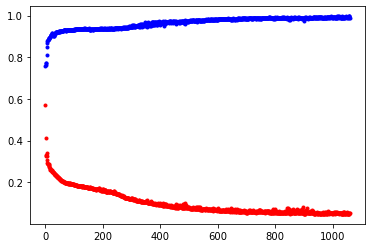

In [29]:
#테스트셋으로 실험결과의 오차값을 저장
y_vloss=hist.history['val_loss']   #.history : 학습이력 정보(loss,acc..) 리턴

#학습셋으로 측정한 정확도의 값을 저장
y_acc=hist.history['accuracy']

#x값을 지정하고 정확도를 파란색으로,오차를 빨간색으로
x_len=np.arange(len(y_acc))
plt.plot(x_len,y_vloss,'o',c='red',markersize=3)
plt.plot(x_len,y_acc,'o',c='blue',markersize=3)

plt.show()

# 보스턴 집값(수치) 예측  
주어진 환경요인과 집값의 변동을 학습해서, 환경요인만 놓고 집값을 예측하는 것(선형회귀 문제)  
!=참(1) 또는 거짓(0)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split  #학습셋,검증셋 나누기

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

df=pd.read_csv('C:/Users/user/machine_learning1/housing.csv')  #delim_whitespace=True 로도 가능(구분자 탭일 경우)
dataset=df.values
X=dataset[:,0:13]
Y=dataset[:,13]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=seed) #학습셋, 검증셋 나눔

model=Sequential()
model.add(Dense(30,input_dim=13,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))  #마지막에 참과 거짓 구분필요 X=>출력층에 활성화함수 지정할 필요 X
       
model.compile(loss='mean_squared_error', #선형회귀니까
             optimizer='adam')
model.fit(X_train,Y_train,epochs=200,batch_size=10)

#예측값과 실제값의 비교
Y_prediction=model.predict(X_test).flatten()
for i in range(20):
    label=Y_test[i]
    prediction=Y_prediction[i]
    print('실제가격:{}, 예상가격:{}'.format(label,prediction)) #이진분류 아니니까 accuracy 출력X

Epoch 1/200
36/36 [==============================] - 0s 613us/step - loss: 8395.1074
Epoch 2/200
36/36 [==============================] - 0s 594us/step - loss: 730.6397
Epoch 3/200
36/36 [==============================] - 0s 565us/step - loss: 524.4141
Epoch 4/200
36/36 [==============================] - 0s 690us/step - loss: 389.0129
Epoch 5/200
36/36 [==============================] - 0s 650us/step - loss: 249.0719
Epoch 6/200
36/36 [==============================] - 0s 667us/step - loss: 163.8280
Epoch 7/200
36/36 [==============================] - 0s 626us/step - loss: 136.2905
Epoch 8/200
36/36 [==============================] - 0s 638us/step - loss: 125.9917
Epoch 9/200
36/36 [==============================] - 0s 630us/step - loss: 116.4055
Epoch 10/200
36/36 [==============================] - 0s 672us/step - loss: 96.4093
Epoch 11/200
36/36 [==============================] - 0s 616us/step - loss: 85.5798
Epoch 12/200
36/36 [==============================] - 0s 639us/step - loss:

36/36 [==============================] - 0s 666us/step - loss: 21.8140
Epoch 195/200
36/36 [==============================] - 0s 657us/step - loss: 19.7876
Epoch 196/200
36/36 [==============================] - 0s 662us/step - loss: 20.5867
Epoch 197/200
36/36 [==============================] - 0s 652us/step - loss: 19.8300
Epoch 198/200
36/36 [==============================] - 0s 615us/step - loss: 20.1106
Epoch 199/200
36/36 [==============================] - 0s 607us/step - loss: 20.5687
Epoch 200/200
36/36 [==============================] - 0s 639us/step - loss: 20.0043
실제가격:22.0, 예상가격:24.666141510009766
실제가격:43.8, 예상가격:32.396339416503906
실제가격:14.6, 예상가격:14.762693405151367
실제가격:32.7, 예상가격:28.130172729492188
실제가격:12.5, 예상가격:15.842721939086914
실제가격:23.1, 예상가격:22.731189727783203
실제가격:21.0, 예상가격:20.126985549926758
실제가격:5.6, 예상가격:11.413947105407715
실제가격:27.0, 예상가격:34.75926971435547
실제가격:17.0, 예상가격:15.238564491271973
실제가격:8.7, 예상가격:13.4194917678833
실제가격:21.9, 예상가격:23.867578506469727
실제가격

# 피마인디언 당뇨병 예측

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split  

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

df=pd.read_csv('C:/Users/user/machine_learning1/pima-indians-diabetes.csv')  
dataset=df.values
X=dataset[:,0:8]
Y=dataset[:,8]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=seed) 
#x_train=dataset[:700,0:8]
#y_train=dataset[:700,8]
#x_test=dataset[700:,0:8]
#y_test=dataset[700:,8]

model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  
       
model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=1500,batch_size=64)

scores=model.evaluate(X_test,Y_test)
#print('Test Accuracy:{}'.format(model.evaluate(X_test,Y_test)[1])) 
print('%s:%.2f%%'%(model.metrics_names[1],scores[1]*100))

Epoch 1/1500
9/9 [==============================] - 0s 665us/step - loss: 11.5562 - accuracy: 0.6231
Epoch 2/1500
9/9 [==============================] - 0s 776us/step - loss: 9.8860 - accuracy: 0.6213
Epoch 3/1500
9/9 [==============================] - 0s 876us/step - loss: 8.3591 - accuracy: 0.6231
Epoch 4/1500
9/9 [==============================] - 0s 886us/step - loss: 6.9267 - accuracy: 0.6175
Epoch 5/1500
9/9 [==============================] - 0s 767us/step - loss: 5.5075 - accuracy: 0.6194
Epoch 6/1500
9/9 [==============================] - 0s 667us/step - loss: 4.1984 - accuracy: 0.6213
Epoch 7/1500
9/9 [==============================] - 0s 757us/step - loss: 3.1246 - accuracy: 0.6287
Epoch 8/1500
9/9 [==============================] - 0s 746us/step - loss: 2.3000 - accuracy: 0.6306
Epoch 9/1500
9/9 [==============================] - 0s 776us/step - loss: 1.8287 - accuracy: 0.6418
Epoch 10/1500
9/9 [==============================] - 0s 665us/step - loss: 1.5169 - accuracy: 0.621

9/9 [==============================] - 0s 664us/step - loss: 0.5584 - accuracy: 0.7015
Epoch 163/1500
9/9 [==============================] - 0s 554us/step - loss: 0.5590 - accuracy: 0.7052
Epoch 164/1500
9/9 [==============================] - 0s 688us/step - loss: 0.5546 - accuracy: 0.7201
Epoch 165/1500
9/9 [==============================] - 0s 570us/step - loss: 0.5532 - accuracy: 0.7183
Epoch 166/1500
9/9 [==============================] - 0s 641us/step - loss: 0.5554 - accuracy: 0.7108
Epoch 167/1500
9/9 [==============================] - 0s 561us/step - loss: 0.5504 - accuracy: 0.7239
Epoch 168/1500
9/9 [==============================] - 0s 665us/step - loss: 0.5543 - accuracy: 0.7146
Epoch 169/1500
9/9 [==============================] - 0s 613us/step - loss: 0.5544 - accuracy: 0.7052
Epoch 170/1500
9/9 [==============================] - 0s 695us/step - loss: 0.5525 - accuracy: 0.7090
Epoch 171/1500
9/9 [==============================] - 0s 640us/step - loss: 0.5528 - accuracy: 0.

9/9 [==============================] - 0s 665us/step - loss: 0.5136 - accuracy: 0.7481
Epoch 323/1500
9/9 [==============================] - 0s 573us/step - loss: 0.5085 - accuracy: 0.7481
Epoch 324/1500
9/9 [==============================] - 0s 554us/step - loss: 0.5094 - accuracy: 0.7668
Epoch 325/1500
9/9 [==============================] - 0s 798us/step - loss: 0.5026 - accuracy: 0.7668
Epoch 326/1500
9/9 [==============================] - 0s 719us/step - loss: 0.5168 - accuracy: 0.7519
Epoch 327/1500
9/9 [==============================] - 0s 674us/step - loss: 0.5068 - accuracy: 0.7519
Epoch 328/1500
9/9 [==============================] - 0s 546us/step - loss: 0.5064 - accuracy: 0.7612
Epoch 329/1500
9/9 [==============================] - 0s 721us/step - loss: 0.5049 - accuracy: 0.7593
Epoch 330/1500
9/9 [==============================] - 0s 554us/step - loss: 0.5044 - accuracy: 0.7593
Epoch 331/1500
9/9 [==============================] - 0s 684us/step - loss: 0.5026 - accuracy: 0.

9/9 [==============================] - 0s 598us/step - loss: 0.4840 - accuracy: 0.7705
Epoch 483/1500
9/9 [==============================] - 0s 554us/step - loss: 0.4798 - accuracy: 0.7724
Epoch 484/1500
9/9 [==============================] - 0s 728us/step - loss: 0.4803 - accuracy: 0.7724
Epoch 485/1500
9/9 [==============================] - 0s 665us/step - loss: 0.4828 - accuracy: 0.7705
Epoch 486/1500
9/9 [==============================] - 0s 742us/step - loss: 0.4794 - accuracy: 0.7649
Epoch 487/1500
9/9 [==============================] - 0s 657us/step - loss: 0.4841 - accuracy: 0.7687
Epoch 488/1500
9/9 [==============================] - 0s 603us/step - loss: 0.4811 - accuracy: 0.7743
Epoch 489/1500
9/9 [==============================] - 0s 596us/step - loss: 0.4800 - accuracy: 0.7705
Epoch 490/1500
9/9 [==============================] - 0s 663us/step - loss: 0.4781 - accuracy: 0.7687
Epoch 491/1500
9/9 [==============================] - 0s 630us/step - loss: 0.4784 - accuracy: 0.

9/9 [==============================] - 0s 665us/step - loss: 0.4694 - accuracy: 0.7743
Epoch 643/1500
9/9 [==============================] - 0s 554us/step - loss: 0.4658 - accuracy: 0.7910
Epoch 644/1500
9/9 [==============================] - 0s 665us/step - loss: 0.4641 - accuracy: 0.7799
Epoch 645/1500
9/9 [==============================] - 0s 631us/step - loss: 0.4645 - accuracy: 0.7929
Epoch 646/1500
9/9 [==============================] - 0s 731us/step - loss: 0.4640 - accuracy: 0.7854
Epoch 647/1500
9/9 [==============================] - 0s 665us/step - loss: 0.4672 - accuracy: 0.7780
Epoch 648/1500
9/9 [==============================] - 0s 554us/step - loss: 0.4668 - accuracy: 0.7873
Epoch 649/1500
9/9 [==============================] - 0s 639us/step - loss: 0.4777 - accuracy: 0.7724
Epoch 650/1500
9/9 [==============================] - 0s 554us/step - loss: 0.4792 - accuracy: 0.7724
Epoch 651/1500
9/9 [==============================] - 0s 699us/step - loss: 0.4701 - accuracy: 0.

9/9 [==============================] - 0s 661us/step - loss: 0.4555 - accuracy: 0.7836
Epoch 803/1500
9/9 [==============================] - 0s 657us/step - loss: 0.4533 - accuracy: 0.7985
Epoch 804/1500
9/9 [==============================] - 0s 665us/step - loss: 0.4523 - accuracy: 0.7873
Epoch 805/1500
9/9 [==============================] - 0s 665us/step - loss: 0.4555 - accuracy: 0.7929
Epoch 806/1500
9/9 [==============================] - 0s 665us/step - loss: 0.4550 - accuracy: 0.8004
Epoch 807/1500
9/9 [==============================] - 0s 606us/step - loss: 0.4512 - accuracy: 0.7892
Epoch 808/1500
9/9 [==============================] - 0s 657us/step - loss: 0.4528 - accuracy: 0.7892
Epoch 809/1500
9/9 [==============================] - 0s 673us/step - loss: 0.4488 - accuracy: 0.7948
Epoch 810/1500
9/9 [==============================] - 0s 590us/step - loss: 0.4485 - accuracy: 0.8004
Epoch 811/1500
9/9 [==============================] - 0s 677us/step - loss: 0.4498 - accuracy: 0.

9/9 [==============================] - 0s 574us/step - loss: 0.4385 - accuracy: 0.7929
Epoch 963/1500
9/9 [==============================] - 0s 720us/step - loss: 0.4369 - accuracy: 0.8078
Epoch 964/1500
9/9 [==============================] - 0s 544us/step - loss: 0.4374 - accuracy: 0.8041
Epoch 965/1500
9/9 [==============================] - 0s 655us/step - loss: 0.4384 - accuracy: 0.8041
Epoch 966/1500
9/9 [==============================] - 0s 562us/step - loss: 0.4370 - accuracy: 0.8004
Epoch 967/1500
9/9 [==============================] - 0s 665us/step - loss: 0.4340 - accuracy: 0.8004
Epoch 968/1500
9/9 [==============================] - 0s 643us/step - loss: 0.4490 - accuracy: 0.7854
Epoch 969/1500
9/9 [==============================] - 0s 630us/step - loss: 0.4564 - accuracy: 0.7854
Epoch 970/1500
9/9 [==============================] - 0s 713us/step - loss: 0.4368 - accuracy: 0.8041
Epoch 971/1500
9/9 [==============================] - 0s 560us/step - loss: 0.4355 - accuracy: 0.

9/9 [==============================] - 0s 660us/step - loss: 0.4341 - accuracy: 0.7985
Epoch 1043/1500
9/9 [==============================] - 0s 665us/step - loss: 0.4363 - accuracy: 0.7948
Epoch 1044/1500
9/9 [==============================] - 0s 554us/step - loss: 0.4336 - accuracy: 0.7985
Epoch 1045/1500
9/9 [==============================] - 0s 729us/step - loss: 0.4335 - accuracy: 0.7929
Epoch 1046/1500
9/9 [==============================] - 0s 656us/step - loss: 0.4325 - accuracy: 0.7985
Epoch 1047/1500
9/9 [==============================] - 0s 782us/step - loss: 0.4395 - accuracy: 0.7948
Epoch 1048/1500
9/9 [==============================] - 0s 667us/step - loss: 0.4307 - accuracy: 0.8022
Epoch 1049/1500
9/9 [==============================] - 0s 771us/step - loss: 0.4368 - accuracy: 0.8022
Epoch 1050/1500
9/9 [==============================] - 0s 676us/step - loss: 0.4581 - accuracy: 0.7799
Epoch 1051/1500
9/9 [==============================] - 0s 692us/step - loss: 0.4324 - acc

9/9 [==============================] - 0s 554us/step - loss: 0.4171 - accuracy: 0.8153
Epoch 1201/1500
9/9 [==============================] - 0s 742us/step - loss: 0.4173 - accuracy: 0.8078
Epoch 1202/1500
9/9 [==============================] - 0s 657us/step - loss: 0.4324 - accuracy: 0.7873
Epoch 1203/1500
9/9 [==============================] - 0s 669us/step - loss: 0.4518 - accuracy: 0.7761
Epoch 1204/1500
9/9 [==============================] - 0s 651us/step - loss: 0.4362 - accuracy: 0.8004
Epoch 1205/1500
9/9 [==============================] - 0s 679us/step - loss: 0.4244 - accuracy: 0.7948
Epoch 1206/1500
9/9 [==============================] - 0s 537us/step - loss: 0.4178 - accuracy: 0.8022
Epoch 1207/1500
9/9 [==============================] - 0s 665us/step - loss: 0.4195 - accuracy: 0.8022
Epoch 1208/1500
9/9 [==============================] - 0s 575us/step - loss: 0.4181 - accuracy: 0.8078
Epoch 1209/1500
9/9 [==============================] - 0s 660us/step - loss: 0.4168 - acc

9/9 [==============================] - 0s 674us/step - loss: 0.4093 - accuracy: 0.8078
Epoch 1359/1500
9/9 [==============================] - 0s 665us/step - loss: 0.4214 - accuracy: 0.7948
Epoch 1360/1500
9/9 [==============================] - 0s 554us/step - loss: 0.4219 - accuracy: 0.7985
Epoch 1361/1500
9/9 [==============================] - 0s 683us/step - loss: 0.4213 - accuracy: 0.7910
Epoch 1362/1500
9/9 [==============================] - 0s 672us/step - loss: 0.4212 - accuracy: 0.7948
Epoch 1363/1500
9/9 [==============================] - 0s 767us/step - loss: 0.4298 - accuracy: 0.7705
Epoch 1364/1500
9/9 [==============================] - 0s 669us/step - loss: 0.4330 - accuracy: 0.7892
Epoch 1365/1500
9/9 [==============================] - 0s 614us/step - loss: 0.4427 - accuracy: 0.7892
Epoch 1366/1500
9/9 [==============================] - 0s 663us/step - loss: 0.4352 - accuracy: 0.7817
Epoch 1367/1500
9/9 [==============================] - 0s 656us/step - loss: 0.4391 - acc

# CNN

In [14]:
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping 

import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
(X_train,Y_class_train),(X_test,Y_class_test)=mnist.load_data()  #학습셋, 검증셋
print('학습셋 이미지 수 : {}개'.format(X_train.shape[0]))  #kears의 mnist 70000개 데이터 중 60000개는 학습셋,10000개는 데이터셋
print('테스트셋 이미지 수 : {}개'.format(X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


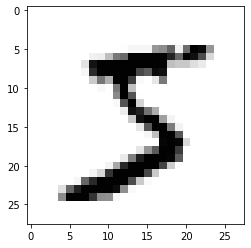

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='Greys') #.imshow : 이미지 불러옴
plt.show()

#가로28x세로28=784개의 픽셀로 이루어져있음
#255개의 등급으로 색깔진함 정도가 나뉨

#이미지는 숫자의 집합으로 바뀌어 학습셋으로 사용됨
#28x28=784개의 속성을 이용해, 0~9까지 10개 클래스 중 하나를 맞히는 문제가 됨

import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

##### 속성(이미지)

In [6]:
X_train=X_train.reshape(X_train.shape[0],784) #28x28개의 2차원 배열을 784개의 1차원 배열로 바꾸어주어야함
#정규화 : 케라스는 데이터를 0~1로 변환할 때 최적의 성능 -> 0~255를 0~1로 바꾸어주어야함(/255)
X_train=X_train.astype('float64') #나누기위해 실수형으로 먼저 바꿔줌
X_train=X_train/255

X_test=X_test.reshape(X_test.shape[0],784).astype('float64')/255

print('class:{}'.format(Y_class_train[0]))

class:5


##### 클래스

In [115]:
#np_utils.to_categorical(클래스,클래스의 개수) : [5]를 [0,0,0,0,1,0,0,0,0,0]으로 바꿔줌
from keras.utils import np_utils

Y_train=np_utils.to_categorical(Y_class_train,10) 
Y_test=np_utils.to_categorical(Y_class_test,10)

#### (합치기)

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


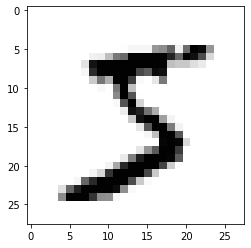

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [17]:
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

(X_train,Y_class_train),(X_test,Y_class_test)=mnist.load_data()  
print('학습셋 이미지 수 : {}개'.format(X_train.shape[0]))  
print('테스트셋 이미지 수 : {}개'.format(X_test.shape[0]))

plt.imshow(X_train[0],cmap='Greys') 
plt.show()

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

#차원 변환 과정(속성인 이미지를 0~1로 정규화)
X_train=X_train.reshape(X_train.shape[0],784).astype('float64')/255 
X_test=X_test.reshape(X_test.shape[0],784).astype('float64')/255

#클래스 값 확인
#print('class:{}'.format(Y_class_train[0]))
#바이너리화 과정(클래스를 0과 1로 표현)
Y_train=np_utils.to_categorical(Y_class_train,10) 
Y_test=np_utils.to_categorical(Y_class_test,10)

#print(Y_train[0])

model=Sequential()
model.add(Dense(30,input_dim=784,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='softmax')) #이진법이 아니니까
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


#모델 저장 폴더 만들기
import os
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
#모델 업데이트 및 저장
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True) #validation_data에서 val_loss

#학습 자동중단 설정
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10) 

#모델 실행
hist=model.fit(X_train,Y_train,epochs=30,batch_size=200,validation_data=(X_test,Y_test), #검증데이터를 X_test,Y_test로 하겠다
               verbose=0,callbacks=[early_stopping_callback,checkpointer]) #validation_split 필요없음(테스트셋,학습셋 나눴으니까)

print('Accuracy:{}'.format(model.evaluate(X_test,Y_test)[1]))

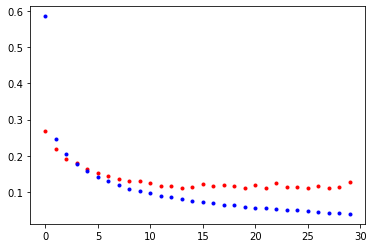

In [18]:
y_vloss=hist.history['val_loss'] #검증 손실값
y_loss=hist.history['loss']  #훈련 손실값

x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,'o',marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,'o',marker='.',c='blue',label='Trainset_loss')

plt.show()

In [143]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [34]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

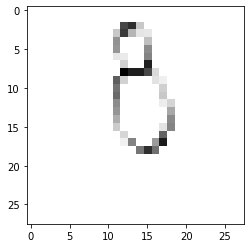

In [61]:
model.save('C:/Users/user/machine_learning1/my_model.h5')
model=load_model('C:/Users/user/machine_learning1/my_model.h5')

img_1=mpimg.imread('C:/Users/user/machine_learning1/a.png')
img_2=mpimg.imread('C:/Users/user/machine_learning1/b.png')
img_3=mpimg.imread('C:/Users/user/machine_learning1/c.png')

img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
img_3=cv2.cvtColor(img_3,cv2.COLOR_BGR2GRAY)

plt.imshow(img_1)
plt.imshow(img_2)
plt.imshow(img_3,cmap='Greys')

In [67]:
import sys

for x in img_3:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [64]:
img_3=img_3.reshape(1,784).astype('float64')/255
print('Answer is',model.predict_classes(img_3))

Answer is [5]


# 컨볼루션 신경망(CNN)  
컨볼루션층과 서브샘플링층을 반복적으로 적용

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint

import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

In [71]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

(X_train,Y_class_train),(X_test,Y_class_test)=mnist.load_data()  
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255 
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
#원-핫 인코딩 방식 적용
Y_train=np_utils.to_categorical(Y_class_train,10) 
Y_test=np_utils.to_categorical(Y_class_test,10)

#컨볼루션 신경망 설정
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=2)) #결과 여전히 크고 복잡하면, 다시한번 축소해줌->구역 나눠서 큰 값 추출

model.add(Dropout(0.25)) #과적합 피함(25%의 노드를 끔)
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

MODEL_DIR='./model_cnn/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
modelpath='./model_cnn/{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True) 

early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10) 

#모델 실행
hist=model.fit(X_train,Y_train,epochs=30,batch_size=200,validation_data=(X_test,Y_test), 
               verbose=1,callbacks=[early_stopping_callback,checkpointer]) 
model.save('C:/Users/user/machine_learning1/my_cnn_model.h5')
print('Accuracy:{}'.format(model.evaluate(X_test,Y_test)[1]))


Epoch 1/30
300/300 [==============================] - ETA: 0s - loss: 0.2753 - accuracy: 0.9173
Epoch 00001: val_loss improved from inf to 0.05715, saving model to ./model_cnn\01-0.0572.hdf5
300/300 [==============================] - 36s 119ms/step - loss: 0.2753 - accuracy: 0.9173 - val_loss: 0.0572 - val_accuracy: 0.9824
Epoch 2/30
300/300 [==============================] - ETA: 0s - loss: 0.0905 - accuracy: 0.9734
Epoch 00002: val_loss improved from 0.05715 to 0.04355, saving model to ./model_cnn\02-0.0435.hdf5
300/300 [==============================] - 36s 119ms/step - loss: 0.0905 - accuracy: 0.9734 - val_loss: 0.0435 - val_accuracy: 0.9852
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.0680 - accuracy: 0.9797
Epoch 00003: val_loss improved from 0.04355 to 0.03457, saving model to ./model_cnn\03-0.0346.hdf5
300/300 [==============================] - 36s 121ms/step - loss: 0.0680 - accuracy: 0.9797 - val_loss: 0.0346 - val_accuracy: 0.9877
Epoch 4/30
300/30

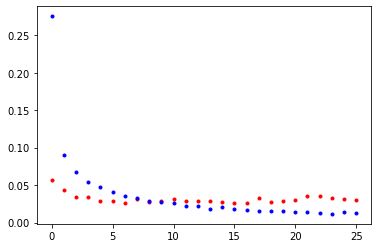

In [72]:
y_vloss=hist.history['val_loss'] 
y_loss=hist.history['loss']  

x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,'o',marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,'o',marker='.',c='blue',label='Trainset_loss')

plt.show()